# Documentation

## Notebook History

**Date | Version | Author | Comments**
- 2022-01-23 | 1.5 | Andre Buser | Checked spelling.
- 2022-01-20 | 1.5 | Andre Buser | Updated structure and Data Science Ethics Checklist. Updated data cleaning, non GDPR entries are now filtered out as unwanted observations.
- 2022-01-18 | 1.4 | Andre Buser | Update parameters section with try/except approach to load paths. Disbaled split of articles, this will be done later in the EDA.
- 2022-01-17 | 1.3 | Andre Buser | Updated impute strategies. Primarily we are keeping the unknown values as a dedicated category.
- 2022-01-15 | 1.2 | Andre Buser | Added export to sqlite db.
- 2022-01-14 | 1.1 | Andre Buser | Updated purpose section. Added CSV export. Updated open todos.
- 2022-01-13 | 1.0 | Andre Buser | Initial version.

## Open tasks / Last Activitites

Open tasks and/or the latest activities in this section:
- [X] Save the result in SQLite DB-file
- [X] **Complete** Data Science Ethics Checklist
- [ ] #TODO: **PARKED** A lot of controller_processor have to be harmonized. Activity **parked** for the moment. **Need should be re-evaluated.**

## Purpose

- The objective of this **stage two** notebook is to clean and prepare the GDPR fines dataset for the EDA phase.
- **IMPORTANT:** Run 02_DCL_CPI after 02_DCL_GDPR-Fines.ipynb to ensure that the country master list, in the SQlite database file, will be updated with the ISO3 country abbreviations.


## Data Science Ethics Checklist

[![Deon badge](https://img.shields.io/badge/ethics%20checklist-deon-brightgreen.svg?style=popout-square)](http://deon.drivendata.org/)

### A. Data Collection
 - [**NA**] **A.1 Informed consent**: If there are human subjects, have they given informed consent, where subjects affirmatively opt-in and have a clear understanding of the data uses to which they consent?
 - [**NA**] **A.2 Collection bias**: Have we considered sources of bias that could be introduced during data collection and survey design and taken steps to mitigate those?
   - Comment: The source "enforcementracker.com" does not guarantee 100% coverage of all GDPR cases. Only publicly available and reported GDPR cases are considered if discovered.
 - [**NA**] **A.3 Limit PII exposure**: Have we considered ways to minimize exposure of personally identifiable information (PII), for example, through anonymization or not collecting information that isn't relevant for analysis?
 - [**NA**] **A.4 Downstream bias mitigation**: Have we considered ways to test downstream results for biased outcomes (e.g., collecting data on protected group status like race or gender)?

### B. Data Storage
 - [**NA**] **B.1 Data security**: Do we have a plan to protect and secure data (e.g., encryption at rest and in transit, access controls on internal users and third parties, access logs, and up-to-date software)?
   - Comment: Encryption is not required because there is no PII.
 - [**NA**] **B.2 Right to be forgotten**: Do we have a mechanism for individuals to request their personal information be removed?
 - [**NA**] **B.3 Data retention plan**: Is there a schedule to delete the data after it is no longer needed?

*Data Science Ethics Checklist generated with [deon](http://deon.drivendata.org).*

# Setup Environment

## Install Modules

In [1]:
# Required for label encoding
!pip install scikit-learn

# Required to document module versions
!pip install watermark

# Required to use pickle files, protocol 2
!pip install pandas --upgrade 

## Import Modules

In [2]:
# Base libraries
import os
import sqlite3

# Scientific libraries
import numpy as np
import pandas as pd

# Helper libraries
import gc # garbage collection to optimize memory usage, use gc.collect()
import warnings
warnings.filterwarnings('ignore')

# Pandas options
pd.set_option('max_colwidth', 40)
pd.options.display.max_columns = None  # Possible to limit
pd.options.display.max_rows = None  # Possible to limit
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Load magic commands
%load_ext watermark


## Define Parameters

In [3]:
try:
    # Mount Google Drive
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)

    # Paths: Google Colabs Setup
    PATH_EXT = "/content/drive/MyDrive/MADS/SIADS591-592/Project/data/external/"
    PATH_RAW = "/content/drive/MyDrive/MADS/SIADS591-592/Project/data/raw/"
    PATH_INT = "/content/drive/MyDrive/MADS/SIADS591-592/Project/data/interim/"
    PATH_PRO = "/content/drive/MyDrive/MADS/SIADS591-592/Project/data/processed/"
    PATH_REP = "/content/drive/MyDrive/MADS/SIADS591-592/Project/reports/"
    PATH_FIGS = "/content/drive/MyDrive/MADS/SIADS591-592/Project/reports/figures/"

except:
    # Paths: Local Setup
    PATH_EXT = "../data/external/"
    PATH_RAW = "../data/raw/"
    PATH_INT = "../data/interim/"
    PATH_PRO = "../data/processed/"
    PATH_REP = "../reports/"
    PATH_FIGS = "../reports/figures/"

# Load Data

In [4]:
# Test: Testing access to path - delete later
FILENAME = "gdpr_fines_enforcementtracker_p2.pkl"
data_path = os.path.join(PATH_EXT, FILENAME)
df = pd.read_pickle(data_path)


In [5]:
df.head()
df.info()
df.shape


,ETid,Country,Date of Decision,Fine [€],Controller/Processor,Quoted Art.,Type,Authority,Sector,Summary
0,ETid-986,GREECE,2021-12-31,30000,INFO COMMUNICATION SERVICES,"Art. 13 GDPR, Art. 14 GDPR, Art. 11 ...",Insufficient fulfilment of informati...,Hellenic Data Protection Authority (...,Industry and Commerce,The Hellenic DPA has imposed a fine ...
1,ETid-985,GREECE,2021-12-31,25000,PLUS REAL ADVERTISEMENT,"Art. 13 GDPR, Art. 14 GDPR, Art. 11 ...",Insufficient fulfilment of informati...,Hellenic Data Protection Authority (...,Industry and Commerce,The Hellenic DPA has imposed a fine ...
2,ETid-984,POLAND,2021-12-09,10000,Warsaw University of Technology,"Art. 5 (1) f) GDPR, Art. 5 (2) GDPR,...",Insufficient technical and organisat...,Polish National Personal Data Protec...,Public Sector and Education,The Polish DPA (UODO) has fined Wars...
3,ETid-983,SPAIN,2022-01-11,9000,EDUCANDO JUNTOS SL,"Art. 6 (1) GDPR, Art. 17 GDPR",Insufficient legal basis for data pr...,Spanish Data Protection Authority (a...,Employment,The Spanish DPA (AEPD) has imposed a...
4,ETid-982,SPAIN,2022-01-11,3000,Property Owner Community,Art. 5 (1) c) GDPR,Non-compliance with general data pro...,Spanish Data Protection Authority (a...,Individuals and Private Associations,Usage of CCTV camera which also capt...


<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 0 to 913
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ETid                  986 non-null    object
 1   Country               986 non-null    object
 2   Date of Decision      986 non-null    object
 3   Fine [€]              986 non-null    object
 4   Controller/Processor  986 non-null    object
 5   Quoted Art.           986 non-null    object
 6   Type                  986 non-null    object
 7   Authority             986 non-null    object
 8   Sector                986 non-null    object
 9   Summary               986 non-null    object
dtypes: object(10)
memory usage: 84.7+ KB


(986, 10)

# Clean Data

**Checklist:**
- [X] Lowercase the column names of the dataframe(s) to make references within the notebook(s) more straightforward and consistent
- [X] Check for consistencies (naming, writing) for all the categorical features
- [X] Create “mapping_key” column based on country+year; used to join the various datasets
- [X] Encode categorical features with ordinal/label-encoding, for pattern and correlation checks; keep the base category for the exploratory analysis
- [X] Drop unused columns
- [X] Check for missing values
- [-] **SKIPPED** Clean and tokenize summary column for planned NLP analysis
- [X] Explode “quoted art.” into separate columns
- [X] Label-encode (re-map); for better correlation later:
- [X] Extracting year from date column
- [X] Create **mapping_key** column: country+year
- [X] Save the result in SQLite DB-file: to **interim** data path


## Clean-up column names

In [6]:
# lowercase for consistency
df.columns = df.columns.str.lower()

In [7]:
# Rename column names for consistency and easier access
rename_columns_list = {
    "date of decision": "decision_date",
    "fine [€]": "fine",
    "controller/processor": "controller_processor",
    "quoted art.": "article",
    "type" : "violation_type",
}

df.rename(columns=rename_columns_list, inplace=True)

In [8]:
df.head()
df.shape

,etid,country,decision_date,fine,controller_processor,article,violation_type,authority,sector,summary
0,ETid-986,GREECE,2021-12-31,30000,INFO COMMUNICATION SERVICES,"Art. 13 GDPR, Art. 14 GDPR, Art. 11 ...",Insufficient fulfilment of informati...,Hellenic Data Protection Authority (...,Industry and Commerce,The Hellenic DPA has imposed a fine ...
1,ETid-985,GREECE,2021-12-31,25000,PLUS REAL ADVERTISEMENT,"Art. 13 GDPR, Art. 14 GDPR, Art. 11 ...",Insufficient fulfilment of informati...,Hellenic Data Protection Authority (...,Industry and Commerce,The Hellenic DPA has imposed a fine ...
2,ETid-984,POLAND,2021-12-09,10000,Warsaw University of Technology,"Art. 5 (1) f) GDPR, Art. 5 (2) GDPR,...",Insufficient technical and organisat...,Polish National Personal Data Protec...,Public Sector and Education,The Polish DPA (UODO) has fined Wars...
3,ETid-983,SPAIN,2022-01-11,9000,EDUCANDO JUNTOS SL,"Art. 6 (1) GDPR, Art. 17 GDPR",Insufficient legal basis for data pr...,Spanish Data Protection Authority (a...,Employment,The Spanish DPA (AEPD) has imposed a...
4,ETid-982,SPAIN,2022-01-11,3000,Property Owner Community,Art. 5 (1) c) GDPR,Non-compliance with general data pro...,Spanish Data Protection Authority (a...,Individuals and Private Associations,Usage of CCTV camera which also capt...


(986, 10)

## Column: **etid**

### Check Consistency

In [9]:
# Check value consistency
df['etid'].unique().tolist()

['ETid-986',
 'ETid-985',
 'ETid-984',
 'ETid-983',
 'ETid-982',
 'ETid-981',
 'ETid-980',
 'ETid-979',
 'ETid-978',
 'ETid-977',
 'ETid-976',
 'ETid-975',
 'ETid-974',
 'ETid-973',
 'ETid-972',
 'ETid-971',
 'ETid-970',
 'ETid-969',
 'ETid-968',
 'ETid-967',
 'ETid-966',
 'ETid-965',
 'ETid-964',
 'ETid-963',
 'ETid-962',
 'ETid-961',
 'ETid-960',
 'ETid-959',
 'ETid-958',
 'ETid-957',
 'ETid-956',
 'ETid-955',
 'ETid-954',
 'ETid-953',
 'ETid-952',
 'ETid-951',
 'ETid-950',
 'ETid-949',
 'ETid-948',
 'ETid-947',
 'ETid-946',
 'ETid-945',
 'ETid-944',
 'ETid-943',
 'ETid-942',
 'ETid-941',
 'ETid-940',
 'ETid-939',
 'ETid-938',
 'ETid-937',
 'ETid-936',
 'ETid-935',
 'ETid-934',
 'ETid-933',
 'ETid-932',
 'ETid-931',
 'ETid-930',
 'ETid-929',
 'ETid-928',
 'ETid-927',
 'ETid-926',
 'ETid-925',
 'ETid-924',
 'ETid-923',
 'ETid-922',
 'ETid-921',
 'ETid-920',
 'ETid-919',
 'ETid-918',
 'ETid-917',
 'ETid-916',
 'ETid-915',
 'ETid-914',
 'ETid-913',
 'ETid-912',
 'ETid-911',
 'ETid-910',

In [10]:
print('Result: All good.')

Result: All good.


## Column: **country**

### Check Consistency

In [11]:
sorted(df['country'].unique().tolist())

['AUSTRIA',
 'BELGIUM',
 'BULGARIA',
 'CROATIA',
 'CYPRUS',
 'CZECH REPUBLIC',
 'DENMARK',
 'ESTONIA',
 'FINLAND',
 'FRANCE',
 'GERMANY',
 'GREECE',
 'HUNGARY',
 'ICELAND',
 'IRELAND',
 'ISLE OF MAN',
 'ITALY',
 'LATVIA',
 'LIECHTENSTEIN',
 'LITHUANIA',
 'LUXEMBOURG',
 'MALTA',
 'NORWAY',
 'POLAND',
 'PORTUGAL',
 'ROMANIA',
 'SLOVAKIA',
 'SPAIN',
 'SWEDEN',
 'THE NETHERLANDS',
 'UNITED KINGDOM']

In [12]:
print('Result: All good.')

Result: All good.


## Column: **decision_date**

### Check Consistency

In [13]:
sorted(df['decision_date'].unique().tolist())

['2018',
 '2018-07-17',
 '2018-09-27',
 '2018-10-25',
 '2018-11-21',
 '2018-12-04',
 '2018-12-09',
 '2018-12-17',
 '2018-12-18',
 '2018-12-20',
 '2019',
 '2019-01-10',
 '2019-01-17',
 '2019-01-21',
 '2019-02-04',
 '2019-02-05',
 '2019-02-08',
 '2019-02-18',
 '2019-02-20',
 '2019-02-22',
 '2019-02-26',
 '2019-02-28',
 '2019-03',
 '2019-03-04',
 '2019-03-19',
 '2019-03-21',
 '2019-03-25',
 '2019-03-26',
 '2019-04-05',
 '2019-04-08',
 '2019-04-12',
 '2019-04-17',
 '2019-04-25',
 '2019-04-29',
 '2019-05-06',
 '2019-05-09',
 '2019-05-16',
 '2019-05-21',
 '2019-05-23',
 '2019-05-28',
 '2019-05-31',
 '2019-06-03',
 '2019-06-11',
 '2019-06-13',
 '2019-06-18',
 '2019-06-25',
 '2019-06-26',
 '2019-06-27',
 '2019-07',
 '2019-07-02',
 '2019-07-05',
 '2019-07-17',
 '2019-07-25',
 '2019-07-30',
 '2019-08',
 '2019-08-02',
 '2019-08-05',
 '2019-08-08',
 '2019-08-16',
 '2019-08-20',
 '2019-08-26',
 '2019-08-28',
 '2019-09-03',
 '2019-09-10',
 '2019-09-17',
 '2019-09-19',
 '2019-09-26',
 '2019-10',
 '20

In [14]:
print('Result:')
print('- Inconsistencies in date format: some entries are missing the day ot day and month')
print('- Some "unknown" entries, which will be imputed (ffill)')

Result:
- Inconsistencies in date format: some entries are missing the day ot day and month
- Some "unknown" entries, which will be imputed (ffill)


### Check Missing Values

In [15]:
df[df['decision_date'] == 'Unknown']

,etid,country,decision_date,fine,controller_processor,article,violation_type,authority,sector,summary
46,ETid-940,GERMANY,Unknown,600,Unknown,Art. 6 GDPR,Insufficient legal basis for data pr...,Data Protection Authority of Rhinela...,Individuals and Private Associations,Unlawful use of a dashcam
47,ETid-939,GERMANY,Unknown,300,Unknown,Art. 6 GDPR,Insufficient legal basis for data pr...,Data Protection Authority of Rhinela...,Individuals and Private Associations,Unlawful use of a dashcam
48,ETid-938,GERMANY,Unknown,50,Unknown,Art. 6 GDPR,Insufficient legal basis for data pr...,Data Protection Authority of Rhinela...,Individuals and Private Associations,Unlawful use of a dashcam
793,ETid-121,SPAIN,Unknown,10000,Ikea Ibérica,Art. 6 GDPR,Insufficient legal basis for data pr...,Spanish Data Protection Authority (a...,Industry and Commerce,The company installed cookies on an ...
802,ETid-112,CZECH REPUBLIC,Unknown,980,Individual entrepreneur - no further...,Art. 32 GDPR,Insufficient technical and organisat...,Czech Data Protection Auhtority (UOOU),Individuals and Private Associations,The operator of an online game was e...
803,ETid-111,CZECH REPUBLIC,Unknown,588,Alza.cz a.s.,"Art. 6 GDPR, Art. 7 GDPR",Insufficient legal basis for data pr...,Czech Data Protection Auhtority (UOOU),Industry and Commerce,The company obtained a copy of photo...
805,ETid-109,SLOVAKIA,Unknown,50000,Social Insurance Agency,Art. 32 GDPR,Insufficient technical and organisat...,Slovak Data Protection Office,Health Care,Applications for social benefits fro...
810,ETid-104,SPAIN,Unknown,12000,Madrileña Red de Gas,Art. 32 GDPR,Insufficient technical and organisat...,Spanish Data Protection Authority (a...,Transportation and Energy,The gas company did not have appropr...
819,ETid-95,SLOVAKIA,Unknown,40000,Slovak Telekom,Art. 32 GDPR,Insufficient technical and organisat...,Slovak Data Protection Office,"Media, Telecoms and Broadcasting",The controller did not take adequate...
822,ETid-92,SLOVAKIA,Unknown,Unknown,Unknown,"Art. 5 (1) a) GDPR, Art. 6 (1) a) GDPR",Insufficient legal basis for data pr...,Slovak Data Protection Office,Public Sector and Education,Personal data have been unlawfully p...


#### Impute Missing Values

**Impute strategy for decision_date**: The enforcement tracker database is populated chronologically. Therefore, we will use the year from the previous entries (**ffill()**).

In [16]:
# Flag records where the decision will be imputed
df['decision_date_imputed'] = df['decision_date'].apply(lambda x: 'Yes' if x=='Unknown' else 'No')

In [17]:
df['decision_date'].replace("Unknown",np.nan, inplace=True)
df['decision_date'].ffill(inplace=True)

In [18]:
assert len(df[df['decision_date'].isna()]) == 0

In [19]:
df.shape

(986, 11)

### Remove unwanted observations

In [20]:
df['decision_year'] = df['decision_date'].str[0:4].astype(int)
df['decision_year'].unique()


array([2021, 2022, 2019, 2020, 2018])

In [21]:
# Dropping entries for 2022 because this year is out of scope
df = df[df['decision_year'] < 2022]

assert len(df[df['decision_year'] == 2022]) == 0

In [22]:
df.shape

(983, 12)

## Column: **sector**

### Check Consistency

In [23]:
df['sector'].value_counts()

Industry and Commerce                   212
Media, Telecoms and Broadcasting        167
Public Sector and Education             131
Finance, Insurance and Consulting        98
Health Care                              80
Individuals and Private Associations     71
Employment                               69
Not assigned                             55
Transportation and Energy                44
Accomodation and Hospitalty              28
Real Estate                              28
Name: sector, dtype: int64

In [24]:
print('Result:\n- Rename not assigned to unknown to consistently flag unknown value across the dataset')

Result:
- Rename not assigned to unknown to consistently flag unknown value across the dataset


In [25]:
# Rename not assigned to unknown to consistently flag unknown value across the dataset
df['sector'].replace("Not assigned","Unknown", inplace=True)

In [26]:
df.shape

(983, 12)

## Column: **fine**

### Check Consistency

In [27]:
#sorted(df['fine'].unique().tolist())
print('Result:\n - Remove/repace text and 0 with NAN')

Result:
 - Remove/repace text and 0 with NAN


In [28]:
# Replace with REGEX approach, later
#df['fine'].replace("Unknown",np.NAN, inplace=True)
#df['fine'].replace("Only intention to issue fine",np.NAN, inplace=True)
#df['fine'].replace("Fine amount between EUR 350 and EUR 1,000",np.NAN, inplace=True)
#df['fine'].replace("Fine amount between EUR 50 and EUR 800",np.NAN, inplace=True)
#df['fine'].replace(0,np.NAN, inplace=True)

df['fine'].replace("Only intention to issue fine","Unknown", inplace=True)
df['fine'].replace("Fine amount between EUR 350 and EUR 1,000","Unknown", inplace=True)
df['fine'].replace("Fine amount between EUR 50 and EUR 800","Unknown", inplace=True)
df['fine'].replace(0,"Unknown", inplace=True)

### Check Missing Values

In [29]:
column = "fine"
unknown_count = len(df[df[column] == "Unknown"])
df[df[column] == "Unknown"]
print("Unknown count: ",unknown_count)

,etid,country,decision_date,fine,controller_processor,article,violation_type,authority,sector,summary,decision_date_imputed,decision_year
43,ETid-943,GERMANY,2019,Unknown,Unknown,Art. 6 GDPR,Insufficient legal basis for data pr...,Data Protection Authority of Lower S...,Individuals and Private Associations,Nine fines between EUR 350 and EUR 1...,No,2019
44,ETid-942,GERMANY,2019,Unknown,Unknown,Art. 6 GDPR,Insufficient legal basis for data pr...,Data Protection Authority of Saxony,Individuals and Private Associations,Eight fines between EUR 50 and EUR 8...,No,2019
39,ETid-875,IRELAND,2021-10-06,Unknown,Facebook Ireland Limited,"Art. 5 (1) a) GDPR, Art. 12 (1) GDPR...",Insufficient fulfilment of informati...,Data Protection Authority of Ireland,"Media, Telecoms and Broadcasting",The organization 'None of your busin...,No,2021
158,ETid-756,CROATIA,2021-07-05,Unknown,Insurance company,"Art. 13 GDPR, Art. 14 GDPR, Art 27 (...",Insufficient fulfilment of informati...,Croatian Data Protection Authority (...,"Finance, Insurance and Consulting","The DPA has ex officio, without prio...",No,2021
169,ETid-745,CROATIA,2021-07-05,Unknown,IT services company,"Art. 32 (1) b), (2) GDPR",Insufficient technical and organisat...,Croatian Data Protection Authority (...,Industry and Commerce,A Croatian IT company provides IT se...,No,2021
247,ETid-667,NORWAY,2021-05-05,Unknown,Disqus Inc.,"Art. 5 (1), (2) GDPR, Art. 6 GDPR, A...",Insufficient legal basis for data pr...,Norwegian Supervisory Authority (Dat...,"Media, Telecoms and Broadcasting","On May 5, 2021, the Norwegian DPA (D...",No,2021
260,ETid-654,CZECH REPUBLIC,2020,Unknown,Unknown,Art. 5 (1) a) GDPR,Insufficient legal basis for data pr...,Czech Data Protection Auhtority (UOOU),Employment,State-subsidized organization shared...,No,2020
261,ETid-653,CZECH REPUBLIC,2020,Unknown,Municipality,"Art. 5 (1) a) GDPR, Art. 6 (1) GDPR,...",Insufficient legal basis for data pr...,Czech Data Protection Auhtority (UOOU),Public Sector and Education,A public school shared personal info...,No,2020
263,ETid-651,CZECH REPUBLIC,2020,Unknown,Unknown,Art. 5 (1) c) GDPR,Non-compliance with general data pro...,Czech Data Protection Auhtority (UOOU),Industry and Commerce,A company stored biometric signature...,No,2020
264,ETid-650,CZECH REPUBLIC,2020,Unknown,Bank,"Art. 48 (1) b) LGT, Art. 21 GDPR, Ar...",Non-compliance with general data pro...,Czech Data Protection Auhtority (UOOU),"Finance, Insurance and Consulting",A bank made the opening of an accoun...,No,2020


Unknown count:  26


#### Imput

**Impute Strategy:** Keep **Unknown** as a dedicated category. Replacing with NAN to convert values into np.NAN.

In [30]:
df['fine'].replace("Unknown",np.NAN, inplace=True)
df['fine'] = df['fine'].astype(float)

#### Add category (binning)

In [31]:
# Old approach
df['fine_cat'] = df['fine'].round(-2)
df['fine_cat'].value_counts()

2000.0         72
3000.0         60
5000.0         57
10000.0        31
4000.0         31
1000.0         31
20000.0        27
40000.0        24
60000.0        23
6000.0         22
50000.0        21
1500.0         20
30000.0        19
15000.0        19
75000.0        16
500.0          15
100000.0       11
8000.0          9
12000.0         8
600.0           8
25000.0         8
0.0             8
1200.0          7
1400.0          7
9000.0          7
80000.0         7
150000.0        7
400000.0        6
200000.0        6
24000.0         6
900.0           6
2800.0          6
70000.0         5
120000.0        5
3200.0          5
1900.0          5
200.0           5
7000.0          5
1600.0          5
36000.0         5
45000.0         4
42000.0         4
3600.0          4
400.0           4
56000.0         4
48000.0         4
2500.0          4
300.0           4
5100.0          4
1800.0          4
2400.0          4
18000.0         4
300000.0        3
900000.0        3
14000.0         3
65000.0   

In [32]:
# Adding additional approach
df['fine_cat2'] = pd.qcut(df['fine'], q=10, labels=False, precision=0) # new binning approach, maybe the correlation coeff. improves
df['fine_cat2'] = df['fine_cat2'].astype(float)

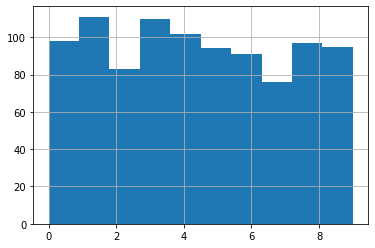

In [33]:
df['fine_cat2'].hist();

In [34]:
df.shape

(983, 14)

## Column: **violation_type**

### Check Consistency

In [35]:
df['violation_type'].value_counts()
print("-----"*10)
print('Result:\n- Consistency good.\n- Address "Unknown" entries')

Insufficient legal basis for data processing                                         340
Non-compliance with general data processing principles                               197
Insufficient technical and organisational measures to ensure information security    194
Insufficient fulfilment of data subjects rights                                       90
Insufficient fulfilment of information obligations                                    82
Insufficient cooperation with supervisory authority                                   38
Insufficient fulfilment of data breach notification obligations                       21
Insufficient involvement of data protection officer                                   11
Unknown                                                                                5
Insufficient data processing agreement                                                 5
Name: violation_type, dtype: int64

--------------------------------------------------
Result:
- Consistency good.
- Address "Unknown" entries


### Check Missing Values

In [36]:
unknown_count = len(df[df['violation_type'] == "Unknown"])
df[df['violation_type'] == "Unknown"]
print("Unknown count: ",unknown_count)

,etid,country,decision_date,fine,controller_processor,article,violation_type,authority,sector,summary,decision_date_imputed,decision_year,fine_cat,fine_cat2
26,ETid-960,NORWAY,2021-12-17,3900.0,T. Stene Transport AS,Unknown,Unknown,Norwegian Supervisory Authority (Dat...,Transportation and Energy,The Norwegian DPA has fined T. Stene...,No,2021,3900.0,3.0
41,ETid-873,AUSTRIA,2021,1200000.0,Customer loyalty program,Unknown,Unknown,Austrian Data Protection Authority (...,Industry and Commerce,According to the newspaper 'Der Stan...,No,2021,1200000.0,9.0
42,ETid-872,AUSTRIA,2021,4000000.0,Bank,Unknown,Unknown,Austrian Data Protection Authority (...,"Finance, Insurance and Consulting",According to the newspaper 'Der Stan...,No,2021,4000000.0,9.0
43,ETid-871,AUSTRIA,2021-09-28,9500000.0,Austrian Post,Unknown,Unknown,Austrian Data Protection Authority (...,Transportation and Energy,The Austrian DPA imposed a fine of E...,No,2021,9500000.0,9.0
883,ETid-31,GERMANY,2018,500.0,Unknown,Unknown,Unknown,Data Protection Authority of Hamburg,Unknown,Unknown,No,2018,500.0,0.0


Unknown count:  5


**Decision**: 
- Keeping the category "Unknown" as a separate category.
- DropETid-31 because it is just an German article about GDPR not a fine.

#### Drop Missing Values

In [37]:
df = df.drop(index=883)
unknown_count = len(df[df['violation_type'] == "Unknown"])

#### Impute Missing Values

**Keeping the category "Unknown" as a separate category.**

In [38]:
# Old approach:
"""
# **Impute Strategy:** Use **most frequent** violation type based on the **sector** and **country**.

most_sector = df[(df['sector'] == 'Transportation and Energy')]['violation_type'].mode()[0]
most_sector

# Flag records where the decision will be imputed
df['violation_type_imputed'] = df['violation_type'].apply(lambda x: 'Yes' if x=="Unknown" else 'No')

# Replace unknown with mode value
df['violation_type'] = df['violation_type'].apply(lambda x: most_sector if x=="Unknown" else x)

# Review and verify result
df[df['violation_type_imputed'] == "Yes"]
assert len(df[df['violation_type_imputed'] == "Yes"]) == unknown_count
"""

'\n# **Impute Strategy:** Use **most frequent** violation type based on the **sector** and **country**.\n\nmost_sector = df[(df[\'sector\'] == \'Transportation and Energy\')][\'violation_type\'].mode()[0]\nmost_sector\n\n# Flag records where the decision will be imputed\ndf[\'violation_type_imputed\'] = df[\'violation_type\'].apply(lambda x: \'Yes\' if x=="Unknown" else \'No\')\n\n# Replace unknown with mode value\ndf[\'violation_type\'] = df[\'violation_type\'].apply(lambda x: most_sector if x=="Unknown" else x)\n\n# Review and verify result\ndf[df[\'violation_type_imputed\'] == "Yes"]\nassert len(df[df[\'violation_type_imputed\'] == "Yes"]) == unknown_count\n'

## Column **article**

### Check Consistency

In [39]:
#df['article'].unique().tolist()
df['article'].value_counts()
print("-----"*10)

print('Result:')
print('- Some unicode needs to be removed "\\xa0"')
print('- Some "unknown" entries, which will be accepted (not imputed')
print('- Missing spaces, e.g. "5(1)" instead of "5 (1)"')
print('- Missing spaces, e.g. "Art.6" instead of "Art. 6"')
print('- Not all quoated articles are related to GDPR"')


Art. 5 GDPR, Art. 6 GDPR                                                                                                                                                                             93
Art. 32 GDPR                                                                                                                                                                                         73
Art. 6 GDPR                                                                                                                                                                                          50
Art. 13 GDPR                                                                                                                                                                                         46
Art. 6 (1) GDPR                                                                                                                                                                                      43


--------------------------------------------------
Result:
- Some unicode needs to be removed "\xa0"
- Some "unknown" entries, which will be accepted (not imputed
- Missing spaces, e.g. "5(1)" instead of "5 (1)"
- Missing spaces, e.g. "Art.6" instead of "Art. 6"
- Not all quoated articles are related to GDPR"


In [40]:
# Remove unicode "\xa0"
df["article"] = df["article"].apply(lambda x: str(x).replace(u"\xa0", u""))

# Asserting successful change/clean up
# Searching for unicode and save results in an interim column
df["search_temp"] = df["article"].str.findall("\xa0")
assert len(df[df["search_temp"].str.len() != 0]) == 0
df.drop("search_temp", axis=1, inplace=True) # Dropping interim column


In [41]:
# Cleaning missing spaces, e.g. "5(1)" instead of "5 (1)"')
regex_pattern = r'(\d{1})(\()' # example: 5(1)
replace_with = r'\g<1> \g<2>'  # example: 5 (1)
df['article'].replace(to_replace=regex_pattern, value=replace_with, regex=True, inplace=True)

# Asserting successful change/clean up
# Searching for string pattern and save results in an interim column
df['search_temp'] = df["article"].str.findall(r'(\d{1})(\()')
assert len(df[df["search_temp"].str.len() != 0]) == 0
df.drop("search_temp", axis=1, inplace=True) # Dropping interim column

In [42]:
# Cleaning missing spaces, e.g. "Art.6" instead of "Art. 6"')
regex_pattern = r'(Art.)(\d{1})' # example: 5(1)
replace_with = r'\g<1> \g<2>'  # example: 5 (1)
df['article'].replace(to_replace=regex_pattern, value=replace_with, regex=True, inplace=True)

# Asserting successful change/clean up
# Searching for string pattern and save results in an interim column
df['search_temp'] = df["article"].str.findall(r'(\d{1})(\()')
assert len(df[df["search_temp"].str.len() != 0]) == 0
df.drop("search_temp", axis=1, inplace=True) # Dropping interim column 

In [43]:
# Cleaning missing spaces, e.g. "25GDPR" instead of "25 GDPR"')
regex_pattern = r'(\d+)(GDPR)' # example: 5(1)
replace_with = r'\g<1> \g<2>'  # example: 5 (1)
df['article'].replace(to_replace=regex_pattern, value=replace_with, regex=True, inplace=True)

# Asserting successful change/clean up
# Searching for string pattern and save results in an interim column
df['search_temp'] = df["article"].str.findall(r'(\d+)(GDPR)')
assert len(df[df["search_temp"].str.len() != 0]) == 0
df.drop("search_temp", axis=1, inplace=True) # Dropping interim column 

In [44]:
df['article'] = df['article'].str.strip()

In [45]:
df.head()
df.shape

,etid,country,decision_date,fine,controller_processor,article,violation_type,authority,sector,summary,decision_date_imputed,decision_year,fine_cat,fine_cat2
0,ETid-986,GREECE,2021-12-31,30000.0,INFO COMMUNICATION SERVICES,"Art. 13 GDPR, Art. 14 GDPR, Art. 11 ...",Insufficient fulfilment of informati...,Hellenic Data Protection Authority (...,Industry and Commerce,The Hellenic DPA has imposed a fine ...,No,2021,30000.0,6.0
1,ETid-985,GREECE,2021-12-31,25000.0,PLUS REAL ADVERTISEMENT,"Art. 13 GDPR, Art. 14 GDPR, Art. 11 ...",Insufficient fulfilment of informati...,Hellenic Data Protection Authority (...,Industry and Commerce,The Hellenic DPA has imposed a fine ...,No,2021,25000.0,6.0
2,ETid-984,POLAND,2021-12-09,10000.0,Warsaw University of Technology,"Art. 5 (1) f) GDPR, Art. 5 (2) GDPR,...",Insufficient technical and organisat...,Polish National Personal Data Protec...,Public Sector and Education,The Polish DPA (UODO) has fined Wars...,No,2021,10000.0,4.0
6,ETid-980,FRANCE,2021-12-31,60000000.0,Facebook Ireland Ltd.,Art. 82 loi Informatique et Libertés,Insufficient legal basis for data pr...,French Data Protection Authority (CNIL),"Media, Telecoms and Broadcasting","On December 31, 2021, the French DPA...",No,2021,60000000.0,9.0
7,ETid-979,FRANCE,2021-12-31,60000000.0,Google Ireland Ltd.,Art. 82 loi Informatique et Libertés,Insufficient legal basis for data pr...,French Data Protection Authority (CNIL),"Media, Telecoms and Broadcasting","On December 31, 2021, the French DPA...",No,2021,60000000.0,9.0


(982, 14)

### Check Missing Values

In [46]:
column = 'article'
unknown_count = len(df[df[column] == "Unknown"])
df[df[column] == "Unknown"]
print("Unknown count: ",unknown_count)

,etid,country,decision_date,fine,controller_processor,article,violation_type,authority,sector,summary,decision_date_imputed,decision_year,fine_cat,fine_cat2
26,ETid-960,NORWAY,2021-12-17,3900.0,T. Stene Transport AS,Unknown,Unknown,Norwegian Supervisory Authority (Dat...,Transportation and Energy,The Norwegian DPA has fined T. Stene...,No,2021,3900.0,3.0
41,ETid-873,AUSTRIA,2021,1200000.0,Customer loyalty program,Unknown,Unknown,Austrian Data Protection Authority (...,Industry and Commerce,According to the newspaper 'Der Stan...,No,2021,1200000.0,9.0
42,ETid-872,AUSTRIA,2021,4000000.0,Bank,Unknown,Unknown,Austrian Data Protection Authority (...,"Finance, Insurance and Consulting",According to the newspaper 'Der Stan...,No,2021,4000000.0,9.0
43,ETid-871,AUSTRIA,2021-09-28,9500000.0,Austrian Post,Unknown,Unknown,Austrian Data Protection Authority (...,Transportation and Energy,The Austrian DPA imposed a fine of E...,No,2021,9500000.0,9.0
136,ETid-778,LUXEMBOURG,2021-07-16,746000000.0,Amazon Europe Core S.à.r.l.,Unknown,Non-compliance with general data pro...,National Commission for Data Protect...,Industry and Commerce,"In its quarterly report, Amazon.com ...",No,2021,746000000.0,9.0
157,ETid-757,DENMARK,2021-07-09,80700.0,Medicals Nordic I/S,Unknown,Non-compliance with general data pro...,Danish Data Protection Authority (Da...,Health Care,The Danish DPA (Datatilsynet) has fi...,No,2021,80700.0,8.0
190,ETid-724,LIECHTENSTEIN,2020,4100.0,Unknown,Unknown,Non-compliance with general data pro...,Data Protection Authority of Liechte...,Unknown,Unlawful operation of a video survei...,No,2020,4100.0,3.0


Unknown count:  7


**Decision**: Keeping the category "Unknown" as a separate category.

In [47]:
df['article'].replace("Unknown","Art. 00 GDPR", inplace=True)

#### Impute Missing Values (old approach)

In [48]:
"""
**Impute Strategy:** Use **most frequent** article type based on sector and violation_type
# Flag records where the decision will be imputed
df['article_imputed'] = df['article'].apply(lambda x: 'Yes' if x=="Unknown" else 'No')

# Find mode and replace
violation_type = "Insufficient legal basis for data processing"
sector = "Transportation and Energy"

most = df[(df["violation_type"] == violation_type) & (df["sector"] == sector)][ "article"].mode()[0]
print("Most: ", most)

# Replace unknown with mode value
df.loc[
    (df["violation_type"] == violation_type)
    & (df["sector"] == sector)
    & (df["article"] == "Unknown"),
    "article",
] = most

violation_type = "Insufficient legal basis for data processing"
sector = "Industry and Commerce"

most = df[(df["violation_type"] == violation_type) & (df["sector"] == sector)][ "article"].mode()[0]
print("Most: ", most)

# Replace unknown with mode value
df.loc[
    (df["violation_type"] == violation_type)
    & (df["sector"] == sector)
    & (df["article"] == "Unknown"),
    "article",
] = most

violation_type = "Insufficient legal basis for data processing"
sector = "Finance, Insurance and Consulting"

most = df[(df["violation_type"] == violation_type) & (df["sector"] == sector)][ "article"].mode()[0]
print("Most: ", most)

# Replace unknown with mode value
df.loc[
    (df["violation_type"] == violation_type)
    & (df["sector"] == sector)
    & (df["article"] == "Unknown"),
    "article",
] = most

violation_type = "Non-compliance with general data processing principles"
sector = "Industry and Commerce"

most = df[(df["violation_type"] == violation_type) & (df["sector"] == sector)][ "article"].mode()[0]
print("Most: ", most)

# Replace unknown with mode value
df.loc[
    (df["violation_type"] == violation_type)
    & (df["sector"] == sector)
    & (df["article"] == "Unknown"),
    "article",
] = most

violation_type = "Non-compliance with general data processing principles"
sector = "Health Care"

most = df[(df["violation_type"] == violation_type) & (df["sector"] == sector)][ "article"].mode()[0]
print("Most: ", most)

# Replace unknown with mode value
df.loc[
    (df["violation_type"] == violation_type)
    & (df["sector"] == sector)
    & (df["article"] == "Unknown"),
    "article",
] = most

df[df['article_imputed'] == "Yes"]
"""

'\n**Impute Strategy:** Use **most frequent** article type based on sector and violation_type\n# Flag records where the decision will be imputed\ndf[\'article_imputed\'] = df[\'article\'].apply(lambda x: \'Yes\' if x=="Unknown" else \'No\')\n\n# Find mode and replace\nviolation_type = "Insufficient legal basis for data processing"\nsector = "Transportation and Energy"\n\nmost = df[(df["violation_type"] == violation_type) & (df["sector"] == sector)][ "article"].mode()[0]\nprint("Most: ", most)\n\n# Replace unknown with mode value\ndf.loc[\n    (df["violation_type"] == violation_type)\n    & (df["sector"] == sector)\n    & (df["article"] == "Unknown"),\n    "article",\n] = most\n\nviolation_type = "Insufficient legal basis for data processing"\nsector = "Industry and Commerce"\n\nmost = df[(df["violation_type"] == violation_type) & (df["sector"] == sector)][ "article"].mode()[0]\nprint("Most: ", most)\n\n# Replace unknown with mode value\ndf.loc[\n    (df["violation_type"] == violation_t

### Remove unwanted observations

In [49]:
# Create temp column to identify GDPR relevant articles
df['gdpr_article'] = df["article"].str.contains('GDPR')
df.shape

# Remove all non-GDPR articles
df = df[df['gdpr_article'] == True]

(982, 15)

In [50]:
df.head()
df.shape

,etid,country,decision_date,fine,controller_processor,article,violation_type,authority,sector,summary,decision_date_imputed,decision_year,fine_cat,fine_cat2,gdpr_article
0,ETid-986,GREECE,2021-12-31,30000.0,INFO COMMUNICATION SERVICES,"Art. 13 GDPR, Art. 14 GDPR, Art. 11 ...",Insufficient fulfilment of informati...,Hellenic Data Protection Authority (...,Industry and Commerce,The Hellenic DPA has imposed a fine ...,No,2021,30000.0,6.0,True
1,ETid-985,GREECE,2021-12-31,25000.0,PLUS REAL ADVERTISEMENT,"Art. 13 GDPR, Art. 14 GDPR, Art. 11 ...",Insufficient fulfilment of informati...,Hellenic Data Protection Authority (...,Industry and Commerce,The Hellenic DPA has imposed a fine ...,No,2021,25000.0,6.0,True
2,ETid-984,POLAND,2021-12-09,10000.0,Warsaw University of Technology,"Art. 5 (1) f) GDPR, Art. 5 (2) GDPR,...",Insufficient technical and organisat...,Polish National Personal Data Protec...,Public Sector and Education,The Polish DPA (UODO) has fined Wars...,No,2021,10000.0,4.0,True
9,ETid-977,ROMANIA,2021-12-06,6000.0,Telekom Romania Communications SA,"Art. 5 (1) d), f) GDPR, Art. 5 (2) G...",Non-compliance with general data pro...,Romanian National Supervisory Author...,"Media, Telecoms and Broadcasting",The Romanian DPA (ANSPDCP) imposed a...,No,2021,6000.0,4.0,True
10,ETid-976,ITALY,2021-11-11,150000.0,TIM S.p.A.,Art. 15 GDPR,Insufficient fulfilment of data subj...,Italian Data Protection Authority (G...,"Media, Telecoms and Broadcasting",The Italian DPA (Garante) has fined ...,No,2021,150000.0,8.0,True


(978, 15)

## Column: **controller_processor** column

### Check Consistency

In [51]:
df['controller_processor'] = df['controller_processor'].str.title()
sorted(df['controller_processor'].unique().tolist())

['A. Επιλογη Ιδιωτικη Κεφαλαιουχικη Εταιρεια',
 'A.P. Eood',
 'Ac Omonia',
 'Acc Consulting Varsinais-Suomi',
 'Accounting Firm',
 'Aconcagua Juegos S.A.',
 'Actamedica Srl',
 'Active Assurances (Car Insurer)',
 'Ad735 Data Media Advertising S.L.',
 'Aegean Marine Petroleum Network Inc.',
 'Aema Hispánica',
 'Aeroporto Guglielmo Marconi Di Bologna S.P.A.',
 'Agency',
 'Agenzia Regionale Protezione Ambientale Campania (Arpac)',
 'Aicomply S.R.L.',
 'Air Europa Lineas Aereas, Sa.',
 'Alava Norte, S.L.',
 'Aleris Sjukvård Ab',
 "Allgemeine Ortskrankenkasse ('Aok') (Health Insurance Company)",
 'Allianz Compañia De Seguros Y Reaseguros, S.A.',
 'Allseas Marine S.A.',
 'Alterna Operador Integral S.L.',
 'Alza.Cz A.S.',
 'Amador Recreativos, S.L',
 'Amalfi Servicios De Restauracion S.L.',
 'Amazon Europe Core S.À.R.L.',
 'American College Of Greece',
 'Ampudia Diaz, S.L.',
 'Anfiteatro Flavio S.R.L.',
 'Aniversalia Networks, S.L.',
 'Anmavas 61, S.L.',
 'Anwara Sp. Z.O.O.',
 'Anytime Fitness

In [52]:
#TODO: A lot of controller_processor have to be harmonized. Activity parked for the moment.
print('Result:\n- A lot of controller_processor have to be harmonized.\n- Activity parked for the moment.')

Result:
- A lot of controller_processor have to be harmonized.
- Activity parked for the moment.


## Create **mapping_key** column

In [53]:
df['mapping_key'] = df['country']+'-'+df['decision_year'].astype(str)
df['mapping_key'] = df['mapping_key'].str.replace(" ","")

df.head()
df.shape

,etid,country,decision_date,fine,controller_processor,article,violation_type,authority,sector,summary,decision_date_imputed,decision_year,fine_cat,fine_cat2,gdpr_article,mapping_key
0,ETid-986,GREECE,2021-12-31,30000.0,Info Communication Services,"Art. 13 GDPR, Art. 14 GDPR, Art. 11 ...",Insufficient fulfilment of informati...,Hellenic Data Protection Authority (...,Industry and Commerce,The Hellenic DPA has imposed a fine ...,No,2021,30000.0,6.0,True,GREECE-2021
1,ETid-985,GREECE,2021-12-31,25000.0,Plus Real Advertisement,"Art. 13 GDPR, Art. 14 GDPR, Art. 11 ...",Insufficient fulfilment of informati...,Hellenic Data Protection Authority (...,Industry and Commerce,The Hellenic DPA has imposed a fine ...,No,2021,25000.0,6.0,True,GREECE-2021
2,ETid-984,POLAND,2021-12-09,10000.0,Warsaw University Of Technology,"Art. 5 (1) f) GDPR, Art. 5 (2) GDPR,...",Insufficient technical and organisat...,Polish National Personal Data Protec...,Public Sector and Education,The Polish DPA (UODO) has fined Wars...,No,2021,10000.0,4.0,True,POLAND-2021
9,ETid-977,ROMANIA,2021-12-06,6000.0,Telekom Romania Communications Sa,"Art. 5 (1) d), f) GDPR, Art. 5 (2) G...",Non-compliance with general data pro...,Romanian National Supervisory Author...,"Media, Telecoms and Broadcasting",The Romanian DPA (ANSPDCP) imposed a...,No,2021,6000.0,4.0,True,ROMANIA-2021
10,ETid-976,ITALY,2021-11-11,150000.0,Tim S.P.A.,Art. 15 GDPR,Insufficient fulfilment of data subj...,Italian Data Protection Authority (G...,"Media, Telecoms and Broadcasting",The Italian DPA (Garante) has fined ...,No,2021,150000.0,8.0,True,ITALY-2021


(978, 16)

## Label encoding

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
le = LabelEncoder()
df['country_label']= le.fit_transform(df['country'].values)
df['violation_type_label']= le.fit_transform(df['violation_type'].values)
df['sector_label']= le.fit_transform(df['sector'].values)
# df['controller_processor_label']= le.fit_transform(df['controller_processor'].values) # attribute not harmonized/cleaned, yet

In [56]:
df.head()
df.shape

,etid,country,decision_date,fine,controller_processor,article,violation_type,authority,sector,summary,decision_date_imputed,decision_year,fine_cat,fine_cat2,gdpr_article,mapping_key,country_label,violation_type_label,sector_label
0,ETid-986,GREECE,2021-12-31,30000.0,Info Communication Services,"Art. 13 GDPR, Art. 14 GDPR, Art. 11 ...",Insufficient fulfilment of informati...,Hellenic Data Protection Authority (...,Industry and Commerce,The Hellenic DPA has imposed a fine ...,No,2021,30000.0,6.0,True,GREECE-2021,11,4,5
1,ETid-985,GREECE,2021-12-31,25000.0,Plus Real Advertisement,"Art. 13 GDPR, Art. 14 GDPR, Art. 11 ...",Insufficient fulfilment of informati...,Hellenic Data Protection Authority (...,Industry and Commerce,The Hellenic DPA has imposed a fine ...,No,2021,25000.0,6.0,True,GREECE-2021,11,4,5
2,ETid-984,POLAND,2021-12-09,10000.0,Warsaw University Of Technology,"Art. 5 (1) f) GDPR, Art. 5 (2) GDPR,...",Insufficient technical and organisat...,Polish National Personal Data Protec...,Public Sector and Education,The Polish DPA (UODO) has fined Wars...,No,2021,10000.0,4.0,True,POLAND-2021,23,7,7
9,ETid-977,ROMANIA,2021-12-06,6000.0,Telekom Romania Communications Sa,"Art. 5 (1) d), f) GDPR, Art. 5 (2) G...",Non-compliance with general data pro...,Romanian National Supervisory Author...,"Media, Telecoms and Broadcasting",The Romanian DPA (ANSPDCP) imposed a...,No,2021,6000.0,4.0,True,ROMANIA-2021,25,8,6
10,ETid-976,ITALY,2021-11-11,150000.0,Tim S.P.A.,Art. 15 GDPR,Insufficient fulfilment of data subj...,Italian Data Protection Authority (G...,"Media, Telecoms and Broadcasting",The Italian DPA (Garante) has fined ...,No,2021,150000.0,8.0,True,ITALY-2021,16,3,6


(978, 19)

# Save dataframe

In [57]:
# Dropping not required columns
#df.drop(['decision_date','authority','gdpr_article','article'], axis=1, inplace=True)
df.drop(['decision_date','authority','gdpr_article'], axis=1, inplace=True)

In [58]:
df.head()
df.shape
df.info()

,etid,country,fine,controller_processor,article,violation_type,sector,summary,decision_date_imputed,decision_year,fine_cat,fine_cat2,mapping_key,country_label,violation_type_label,sector_label
0,ETid-986,GREECE,30000.0,Info Communication Services,"Art. 13 GDPR, Art. 14 GDPR, Art. 11 ...",Insufficient fulfilment of informati...,Industry and Commerce,The Hellenic DPA has imposed a fine ...,No,2021,30000.0,6.0,GREECE-2021,11,4,5
1,ETid-985,GREECE,25000.0,Plus Real Advertisement,"Art. 13 GDPR, Art. 14 GDPR, Art. 11 ...",Insufficient fulfilment of informati...,Industry and Commerce,The Hellenic DPA has imposed a fine ...,No,2021,25000.0,6.0,GREECE-2021,11,4,5
2,ETid-984,POLAND,10000.0,Warsaw University Of Technology,"Art. 5 (1) f) GDPR, Art. 5 (2) GDPR,...",Insufficient technical and organisat...,Public Sector and Education,The Polish DPA (UODO) has fined Wars...,No,2021,10000.0,4.0,POLAND-2021,23,7,7
9,ETid-977,ROMANIA,6000.0,Telekom Romania Communications Sa,"Art. 5 (1) d), f) GDPR, Art. 5 (2) G...",Non-compliance with general data pro...,"Media, Telecoms and Broadcasting",The Romanian DPA (ANSPDCP) imposed a...,No,2021,6000.0,4.0,ROMANIA-2021,25,8,6
10,ETid-976,ITALY,150000.0,Tim S.P.A.,Art. 15 GDPR,Insufficient fulfilment of data subj...,"Media, Telecoms and Broadcasting",The Italian DPA (Garante) has fined ...,No,2021,150000.0,8.0,ITALY-2021,16,3,6


(978, 16)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 0 to 913
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   etid                   978 non-null    object 
 1   country                978 non-null    object 
 2   fine                   952 non-null    float64
 3   controller_processor   978 non-null    object 
 4   article                978 non-null    object 
 5   violation_type         978 non-null    object 
 6   sector                 978 non-null    object 
 7   summary                978 non-null    object 
 8   decision_date_imputed  978 non-null    object 
 9   decision_year          978 non-null    int32  
 10  fine_cat               952 non-null    float64
 11  fine_cat2              952 non-null    float64
 12  mapping_key            978 non-null    object 
 13  country_label          978 non-null    int32  
 14  violation_type_label   978 non-null    int32  
 15  sector

In [59]:
FILENAME = "gdpr_fines_enforcementtracker_CLEANED_p2.pkl"
data_path = os.path.join(PATH_INT, FILENAME)
#df.to_pickle(data_path, protocol=2)

In [60]:
# Saving cleaned dataset as csv to allow quick reviews
FILENAME = "gdpr_fines_enforcementtracker_CLEANED.csv"
data_path = os.path.join(PATH_INT, FILENAME)
df.to_csv(data_path, index=False)

In [61]:
FILENAME = "project_GDPR-fines.sqlite"
data_path = os.path.join(PATH_PRO, FILENAME)

con = sqlite3.connect(data_path)
df.to_sql("GDPR", con, index=False, if_exists="replace")
con.close()

978

In [62]:
# Create and Save **Country Master List**
country_master_df = pd.DataFrame()
country_master_df['country'] = df['country']
country_master_df['country_label'] = df['country_label']
country_master_df = country_master_df.drop_duplicates(keep='first').sort_values('country').reset_index(drop=True)
country_master_df

,country,country_label
0,AUSTRIA,0
1,BELGIUM,1
2,BULGARIA,2
3,CROATIA,3
4,CYPRUS,4
5,CZECH REPUBLIC,5
6,DENMARK,6
7,ESTONIA,7
8,FINLAND,8
9,FRANCE,9


In [63]:
FILENAME = "country_master_list.csv"
data_path = os.path.join(PATH_INT, FILENAME)
country_master_df.to_csv(data_path, index=False)

In [64]:
FILENAME = "project_GDPR-fines.sqlite"
data_path = os.path.join(PATH_PRO, FILENAME)

con = sqlite3.connect(data_path)
country_master_df.to_sql("CML", con, index=False, if_exists="replace")
con.close()

31

**IMPORTANT:** Run 02_DCL_CPI after 02_DCL_GDPR-Fines.ipynb to ensure that the country master list, in the SQlite database file, will be updated with the ISO3 country abbreviations.

# Watermark

In [65]:
%watermark

Last updated: 2022-01-23T23:07:38.589485+01:00

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.30.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 141 Stepping 1, GenuineIntel
CPU cores   : 16
Architecture: 64bit



In [66]:
%watermark --iversions

sqlite3: 2.6.0
sys    : 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:15:42) [MSC v.1916 64 bit (AMD64)]
numpy  : 1.21.4
pandas : 1.4.0



-----
